# Data Preprocessing 

In [1]:
# a. Handling missing data
# b. Handling categorical data
# c. Split the dataset into training set and test set
# d. Feature scaling

### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [3]:
dataset=pd.read_csv("data_preprocessing.csv")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### a. Handling missing data

In [6]:
dataset.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

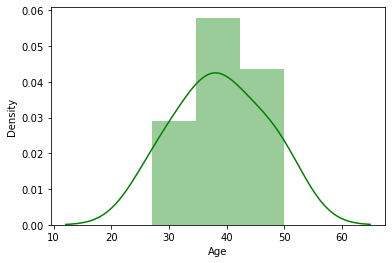

In [7]:
sns.distplot(dataset['Age'],color='green')

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

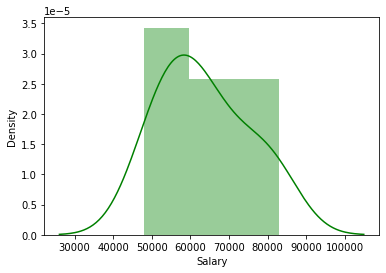

In [30]:
sns.distplot(dataset['Salary'],color='green')

In [31]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

In [32]:
dataset['Salary'].fillna(dataset['Salary'].mean(),inplace=True)

In [12]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Checking for outlier

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

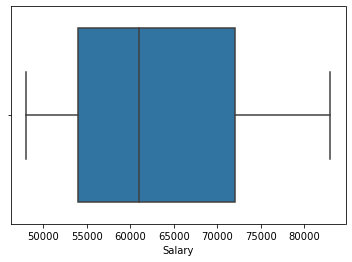

In [8]:
# to handle missing data we replace value by mean
#there is no outlier in salary
sns.boxplot(dataset.Salary)


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

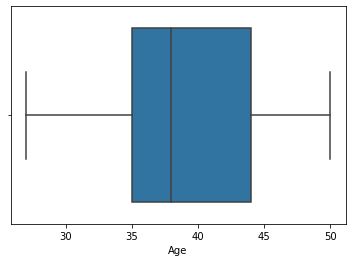

In [9]:
#their is no outlier in 
sns.boxplot(dataset.Age)

In [13]:
x=dataset.iloc[:,:3]
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,61000.0
5,France,35.0,58000.0
6,Spain,38.0,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [14]:
y=dataset['Purchased']
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

### b. Handling categorical data

# 

In [15]:
#on country columns has 3 categort here we use one hot encoading
x=pd.get_dummies(x,columns=['Country'])
x

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,1,0,0
1,27.0,48000.0,0,0,1
2,30.0,54000.0,0,1,0
3,38.0,61000.0,0,0,1
4,40.0,61000.0,0,1,0
5,35.0,58000.0,1,0,0
6,38.0,52000.0,0,0,1
7,48.0,79000.0,1,0,0
8,50.0,83000.0,0,1,0
9,37.0,67000.0,1,0,0


In [16]:
#on purchased columns has 2 categort here we use lable encoading
y=pd.factorize(y)[0]
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

### c. Split the dataset into training set and test set

In [17]:
split_ratio=0.8
split_index=int(split_ratio*len(x))

In [18]:
x_train=x[:split_index]

In [19]:
x_train

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,1,0,0
1,27.0,48000.0,0,0,1
2,30.0,54000.0,0,1,0
3,38.0,61000.0,0,0,1
4,40.0,61000.0,0,1,0
5,35.0,58000.0,1,0,0
6,38.0,52000.0,0,0,1
7,48.0,79000.0,1,0,0


In [20]:
x_test=x[split_index:]

In [21]:
x_test

,Age,Salary,Country_France,Country_Germany,Country_Spain
8,50.0,83000.0,0,1,0
9,37.0,67000.0,1,0,0


In [22]:
y_train=y[:split_index]

In [23]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [24]:
y_test=y[split_index:]
y_test

array([0, 1], dtype=int64)

### d. Feature scaling

In [33]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale

In [34]:
for i in range(2):
    x_train.iloc[:,i]=standardScalling(x_train.iloc[:,i].values)

C:\Users\yamin\AppData\Local\Temp\ipykernel_26872\1059603473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.iloc[:,i]=standardScalling(x_train.iloc[:,i].values)


In [35]:
x_train

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,1.008996,1.173339,1,0,0
1,-1.629916,-1.302278,0,0,1
2,-1.164226,-0.683373,0,1,0
3,0.077615,0.038682,0,0,1
4,0.388075,0.038682,0,1,0
5,-0.388075,-0.270771,1,0,0
6,0.077615,-0.889675,0,0,1
7,1.629916,1.895394,1,0,0


In [28]:
for i in range(2):
    x_test.iloc[:,i]=standardScalling(x_test.iloc[:,i].values)

C:\Users\yamin\AppData\Local\Temp\ipykernel_26872\4032715641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.iloc[:,i]=standardScalling(x_test.iloc[:,i].values)


In [29]:
x_test

,Age,Salary,Country_France,Country_Germany,Country_Spain
8,1.0,1.0,0,1,0
9,-1.0,-1.0,1,0,0
